# Breast Cancer Analysis using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("data.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.dropna(axis = 1)    

In [6]:
df.shape

(569, 32)

In [7]:
df['diagnosis'].value_counts()      # M - having cancer   # B - not having cancer

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

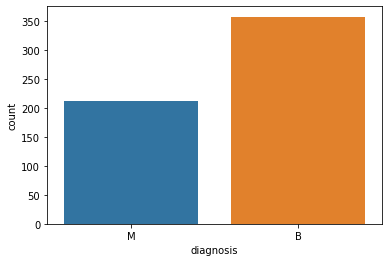

In [9]:
# count of M and B
# sns.countplot(df['diagnosis'], label = 'count')
sns.countplot(x='diagnosis', data=df, label='count')

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Encoding Categorical Data

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1


### Correlation

In [13]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,1.000000
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614


(33.0, 0.0)

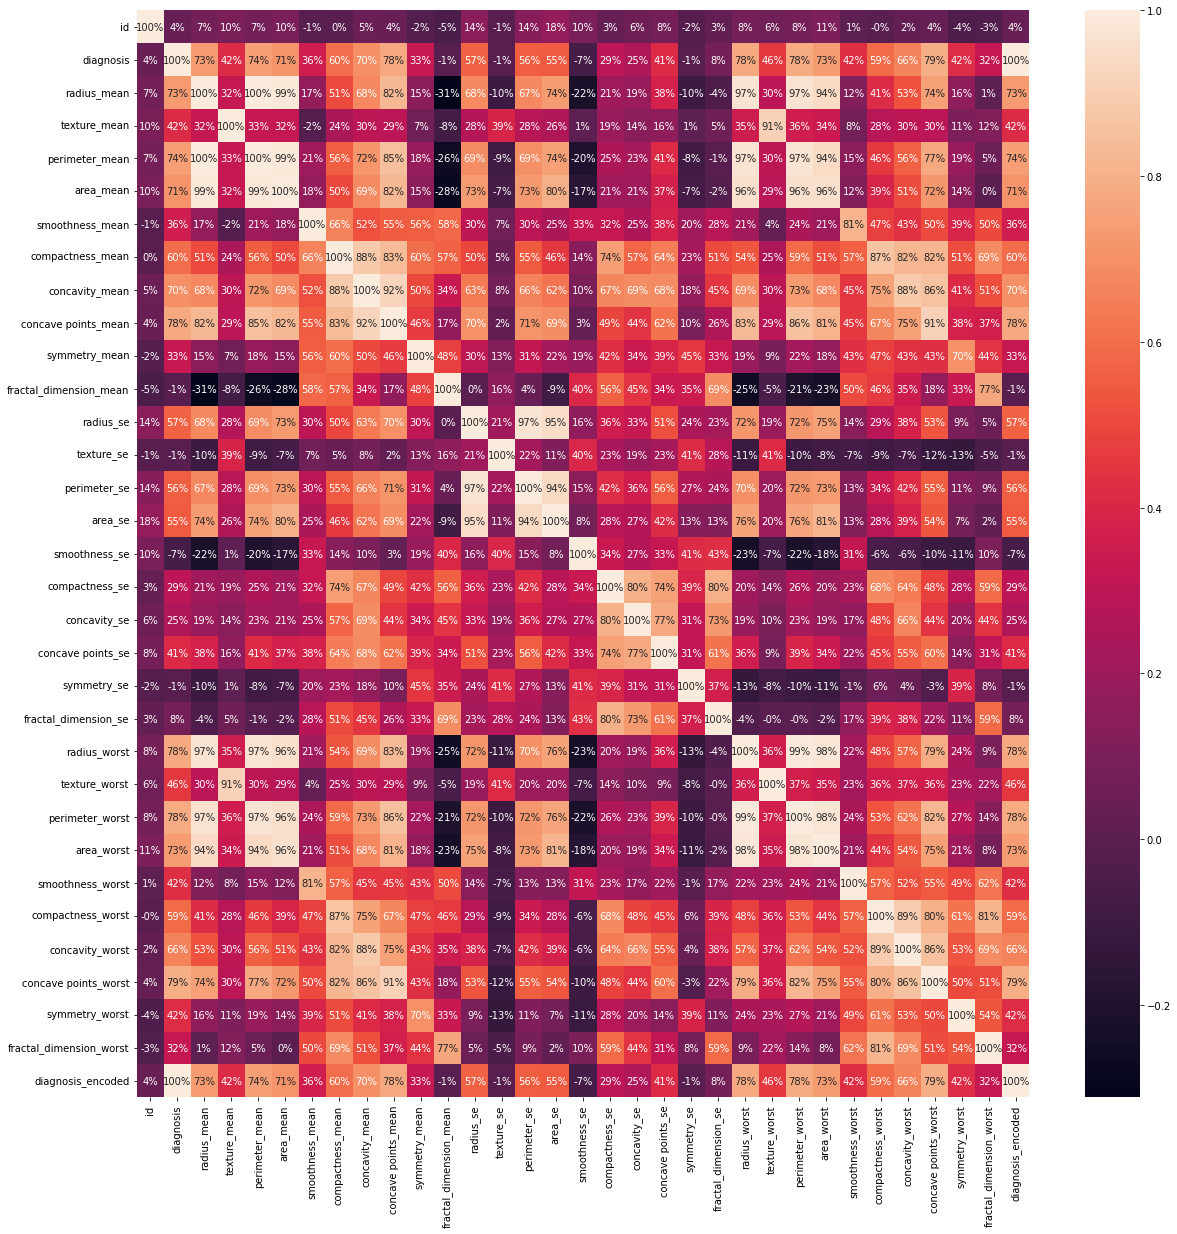

In [14]:
# Visualizing the correlation graph
plt.figure(figsize = (20,20))
ax = sns.heatmap(df.corr(), annot = True, fmt = '.0%')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

In [49]:
# Dropping highly correlated features
new_df = df.drop(['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst','diagnosis_encoded'], axis=1)

In [50]:
X = new_df.drop(['diagnosis'], axis = 1)   #independent
y = new_df['diagnosis']                    #dependent

In [51]:
X.head()

,id,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [52]:
X.shape

(569, 17)

### Train Test Split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.150671e-17,6.823129e-16,-3.040561e-17,-3.712831e-16,1.351515e-16,1.523070e-16,3.327880e-16,-2.722557e-16,2.942928e-17,3.287432e-16,4.407418e-17,-1.665335e-16,1.813178e-16,-4.661960e-17,-4.002940e-17,3.157720e-16,2.071208e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.391158e-01,-2.265799e+00,-1.415904e+00,-3.154619e+00,-1.137578e+00,-2.665744e+00,-1.851347e+00,-1.526736e+00,-6.863113e-01,-1.844334e+00,-1.094086e+00,-1.532310e+00,-1.078191e+00,-2.672370e+00,-1.391304e+00,-2.094184e+00,-1.599036e+00
25%,-2.323888e-01,-7.551212e-01,-6.596851e-01,-7.004241e-01,-7.483043e-01,-6.842324e-01,-7.240302e-01,-6.827902e-01,-4.728811e-01,-6.312051e-01,-5.315521e-01,-6.672911e-01,-5.683025e-01,-7.068235e-01,-7.742265e-01,-6.524167e-01,-6.833502e-01
50%,-2.320765e-01,-1.117840e-01,-3.097783e-01,-3.165413e-02,-3.349449e-01,-5.525183e-02,-1.359284e-01,-2.257626e-01,-3.454901e-01,-2.509158e-01,-1.745157e-01,-2.193611e-01,-2.370954e-01,-1.215325e-02,-2.004118e-01,-1.300027e-01,-2.031343e-01
75%,-1.700197e-01,5.745618e-01,3.203135e-01,6.421523e-01,5.122082e-01,5.246593e-01,4.507140e-01,4.717057e-01,7.506095e-02,4.120316e-01,3.074308e-01,3.102610e-01,2.913176e-01,5.551245e-01,5.710645e-01,4.590940e-01,4.535557e-01
max,6.913776e+00,3.492577e+00,5.023637e+00,3.469765e+00,4.330322e+00,4.400250e+00,5.077455e+00,6.676362e+00,1.006300e+01,5.720160e+00,1.278093e+01,5.024846e+00,9.909610e+00,3.922860e+00,4.333890e+00,5.912480e+00,6.901830e+00


### Logistic Regression


In [56]:
# model = LogisticRegression(random_state=0)
# model.fit(X_train, Y_train)
# y_pred = model.predict(X_test)

In [57]:
model = LogisticRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)



In [58]:
# Accuracy of Logistic Regression
ac_test = model.score(X_test, Y_test)
print('Accuracy: ',ac_test)

Accuracy:  0.9649122807017544


In [59]:
cm = np.array(confusion_matrix(Y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer','predicted_healthy'])

(2.0, 0.0)

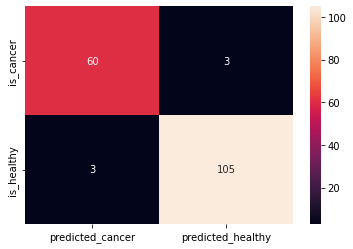

In [60]:
ax = sns.heatmap(confusion,annot=True,fmt="d")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

### Decision Tree


In [61]:
# Initialize and train the Decision Tree classifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, Y_train)

# Predict on the test set
y_pred2 = tree.predict(X_test)

In [62]:
# Calculate accuracy
ac_test2 = tree.score(X_test, Y_test)
print('Accuracy: ', ac_test2)


Accuracy:  0.9239766081871345


In [63]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred2, labels=[1, 0]) 

confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,57,6
is_healthy,7,101


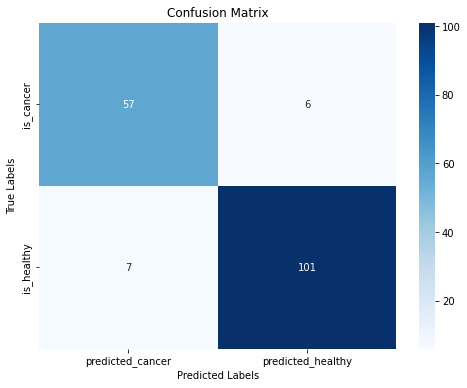

In [64]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Optional: adjust figure size
ax = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [65]:
forest = RandomForestClassifier(n_estimators = 100,random_state=0, criterion='entropy')
forest.fit(X_train, Y_train)
y_pred3 = forest.predict(X_test)

In [66]:
# Accuracy of Random Forest
ac_test3 = forest.score(X_test, Y_test)
print('Accuracy: ',ac_test3)

Accuracy:  0.9649122807017544


In [67]:
cm = np.array(confusion_matrix(Y_test, y_pred3, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer','predicted_healthy'])

(2.0, 0.0)

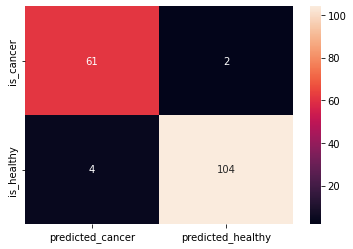

In [68]:
ax = sns.heatmap(confusion,annot=True,fmt="d")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

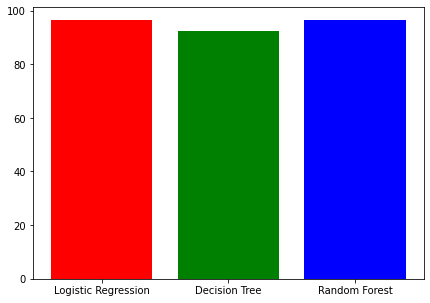

In [69]:
# Figure Size 
fig = plt.figure(figsize =(7, 5))  
# Bar Plot 
plt.bar(["Logistic Regression","Decision Tree","Random Forest"], [ac_test*100,ac_test2*100,ac_test3*100],color = ["red","green","blue"])  
plt.show() 